# Lab: League of Legends Match Predictor 


### Project Introduction  

League of Legends, a popular multiplayer online battle arena (MOBA) game, generates extensive data from matches, providing an excellent opportunity to apply machine learning techniques to real-world scenarios. Perform the following steps to build a logistic regression model aimed at predicting the outcomes of League of Legends matches.  

Use the [league_of_legends_data_large.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv) file to perform the tasks.  

### Step 1: Data Loading and Preprocessing  

#### Task 1: Load the League of Legends dataset and preprocess it for training.  

Loading and preprocessing the dataset involves reading the data, splitting it into training and testing sets, and standardizing the features. We will utilize `pandas` for data manipulation, `train_test_split` from `sklearn` for data splitting, and `StandardScaler` for feature scaling.  


1 .Load the dataset:
Use `pd.read_csv()` to load the dataset into a pandas DataFrame.</br>
2. Split data into features and target: Separate win (target) and the remaining columns (features).</br>
   X = data.drop('win', axis=1)</br>
   y = data['win'] </br>
3 .Split the Data into Training and Testing Sets:
Use `train_test_split()` from `sklearn.model_selection` to divide the data. Set `test_size`=0.2 to allocate 20% for testing and 80% for training, and use `random_state`=42 to ensure reproducibility of the split.</br>
4. Standardize the features:
Use `StandardScaler()` from sklearn.preprocessing to scale the features.</br>
5. Convert to PyTorch tensors:
Use `torch.tensor()` to convert the data to PyTorch tensors.

#### Task 1:  

We write a code to load the dataset, split it into training and testing sets, standardize the features, and convert the data into PyTorch tensors for use in training a PyTorch model.  


### Setup
Installing required libraries:


In [1]:
!pip install pandas
!pip install scikit-learn
!pip install torch
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 161.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 MB 157.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.6/766.6 MB 15.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 26.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 4.6 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 2.3 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 119.5 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB ? eta 0:00:00 0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 24.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 49.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 48.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import pandas
import torch
import matplotlib
import torch.nn as nn
import torch.optim as optim

### Step 2: Logistic Regression Model  

#### Task 2: Implement a logistic regression model using PyTorch.  

Defining the logistic regression model involves specifying the input dimensions, the forward pass using the sigmoid activation function, and initializing the model, loss function, and optimizer.  

1 .Define the Logistic Regression Model:</br>
  Create a class LogisticRegressionModel that inherits from torch.nn.Module.</br>
 - In the `__init__()` method, define a linear layer (nn.Linear) to implement the logistic regression model.</br>
- The `forward()` method should apply the sigmoid activation function to the output of the linear layer.</br>

2.Initialize the Model, Loss Function, and Optimizer:</br>
- Set input_dim: Use `X_train.shape[1]` to get the number of features from the training data (X_train).</br>
- Initialize the model: Create an instance of the LogisticRegressionModel class  (e.g., `model = LogisticRegressionModel()`)while passing input_dim as a parameter</br>
- Loss Function: Use `BCELoss()` from torch.nn (Binary Cross-Entropy Loss).</br>
- Optimizer: Initialize the optimizer using `optim.SGD()` with a learning rate of 0.01</br>

#### Exercise 2:  

Define the logistic regression model using PyTorch, specifying the input dimensions and the forward pass. Initialize the model, loss function, and optimizer.  


In [4]:
# Define the Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # Linear layer

    def forward(self, x):
        return torch.sigmoid(self.linear(x))  # Apply sigmoid activation

# Assuming X_train is already defined and preprocessed from Task 1
# Replace with actual X_train from Task 1
# Example placeholder (replace with real data):
X_train = torch.randn(100, 10)  # 100 samples, 10 features (replace with actual data)

# Set input dimensions
input_dim = X_train.shape[1]

# Initialize the model
model = LogisticRegressionModel(input_dim)

# Define the loss function (Binary Cross-Entropy Loss)
criterion = nn.BCELoss()

# Initialize the optimizer (Stochastic Gradient Descent)
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Printing the model to confirm the structure
print(model)

LogisticRegressionModel(
  (linear): Linear(in_features=10, out_features=1, bias=True)
)


### Step 3: Model Training  

#### Task 3: Train the logistic regression model on the dataset.  

The training loop will run for a specified number of epochs. In each epoch, the model makes predictions, calculates the loss, performs backpropagation, and updates the model parameters.

1. Set Number of Epochs:  
   - Define the number of epochs for training to 1000.

2. Training Loop:  
   For each epoch:
   - Set the model to training mode using `model.train()`.
   - Zero the gradients using `optimizer.zero_grad()`.
   - Pass the training data (`X_train`) through the model to get the predictions (`outputs`).
   - Calculate the loss using the defined loss function (`criterion`).
   - Perform backpropagation with `loss.backward()`.
   - Update the model's weights using `optimizer.step()`.

3. Print Loss Every 100 Epochs:  
   - After every 100 epochs, print the current epoch number and the loss value.

4. Model Evaluation:  
   - Set the model to evaluation mode using `model.eval()`.
   - Use `torch.no_grad()` to ensure no gradients are calculated during evaluation.
   - Get predictions on both the training set (`X_train`) and the test set (`X_test`).

5. Calculate Accuracy:  
   - For both the training and test datasets, compute the accuracy by comparing the predicted values with the true values (`y_train`, `y_test`).
   - Use a threshold of 0.5 for classification
   
6. Print Accuracy:  
   - Print the training and test accuracies after the evaluation is complete.

#### Task 3:  

Write the code to train the logistic regression model on the dataset. Implement the training loop, making predictions, calculating the loss, performing backpropagation, and updating model parameters. Evaluate the model's accuracy on training and testing sets.  


In [5]:
# Define the Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # Linear layer

    def forward(self, x):
        return torch.sigmoid(self.linear(x))  # Apply sigmoid activation

# Assuming X_train, y_train, X_test, y_test are already defined and preprocessed from Task 1
# Replace with actual data
# Example placeholder (replace with real data):
X_train = torch.randn(100, 10)  # 100 samples, 10 features (replace with actual data)
y_train = torch.randint(0, 2, (100, 1)).float()  # Binary target
X_test = torch.randn(20, 10)   # 20 samples, 10 features (replace with actual data)
y_test = torch.randint(0, 2, (20, 1)).float()   # Binary target

# Set input dimensions
input_dim = X_train.shape[1]

# Initialize the model
model = LogisticRegressionModel(input_dim)

# Define the loss function (Binary Cross-Entropy Loss)
criterion = nn.BCELoss()

# Initialize the optimizer (Stochastic Gradient Descent)
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Set the number of epochs
num_epochs = 1000

# Training Loop
for epoch in range(num_epochs):
    model.train()  # Set model to training mode

    optimizer.zero_grad()  # Zero the gradients

    outputs = model(X_train)  # Forward pass
    loss = criterion(outputs, y_train)  # Compute the loss

    loss.backward()  # Backpropagation
    optimizer.step()  # Update the model parameters

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Model Evaluation
model.eval()  # Set model to evaluation mode

with torch.no_grad():
    train_preds = model(X_train)
    test_preds = model(X_test)

    # Apply threshold of 0.5
    train_preds = (train_preds >= 0.5).float()
    test_preds = (test_preds >= 0.5).float()

    # Calculate accuracy
    train_accuracy = (train_preds == y_train).sum().item() / y_train.size(0)
    test_accuracy = (test_preds == y_test).sum().item() / y_test.size(0)

    # Print accuracies
    print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
    print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')


Epoch [100/1000], Loss: 0.6598
Epoch [200/1000], Loss: 0.6429
Epoch [300/1000], Loss: 0.6315
Epoch [400/1000], Loss: 0.6236
Epoch [500/1000], Loss: 0.6180
Epoch [600/1000], Loss: 0.6139
Epoch [700/1000], Loss: 0.6108
Epoch [800/1000], Loss: 0.6085
Epoch [900/1000], Loss: 0.6067
Epoch [1000/1000], Loss: 0.6053
Training Accuracy: 64.00%
Testing Accuracy: 50.00%


### Step 4: Model Optimization and Evaluation  

#### Task 4: Implement optimization techniques and evaluate the model's performance.  

Optimization techniques such as L2 regularization (Ridge Regression) help in preventing overfitting. The model is retrained with these optimizations, and its performance is evaluated on both training and testing sets. 

**Weight Decay** :In the context of machine learning and specifically in optimization algorithms, weight_decay is a parameter used to apply L2 regularization to the model's parameters (weights). It helps prevent the model from overfitting by penalizing large weight values, thereby encouraging the model to find simpler solutions.To use L2 regularization, we need to modify the optimizer by setting the weight_decay parameter. The weight_decay parameter in the optimizer adds the L2 regularization term during training.
For example, when we initialize the optimizer with optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01), the weight_decay=0.01 term applies L2 regularization with a strength of 0.01.

1. Set Up the Optimizer with L2 Regularization:
   - Modify the optimizer to include `weight_decay` for L2 regularization.
   - Example:
     ```python
     optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)
     ```
2. Train the Model with L2 Regularization:
    - Follow the same steps as before but use the updated optimizer with regularization during training.
    - Use epochs=1000
   
3. Evaluate the Optimized Model:
   - After training, evaluate the model on both the training and test datasets.
   - Compute the accuracy for both sets by comparing the model's predictions to the true labels (`y_train` and `y_test`).

4. Calculate and Print the Accuracy:
   - Use a threshold of 0.5 to determine whether the model's predictions are class 0 or class 1.
   - Print the training accuracy and test accuracy  after evaluation.


#### Task 4:  

Implement optimization techniques like L2 regularization and retrain the model. Evaluate the performance of the optimized model on both training and testing sets.  


In [6]:
# Define the Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # Linear layer

    def forward(self, x):
        return torch.sigmoid(self.linear(x))  # Apply sigmoid activation

# Assuming X_train, y_train, X_test, y_test are already defined and preprocessed from Task 1
# Replace with actual data
# Example placeholder (replace with real data):
X_train = torch.randn(100, 10)  # 100 samples, 10 features (replace with actual data)
y_train = torch.randint(0, 2, (100, 1)).float()  # Binary target
X_test = torch.randn(20, 10)   # 20 samples, 10 features (replace with actual data)
y_test = torch.randint(0, 2, (20, 1)).float()   # Binary target

# Set input dimensions
input_dim = X_train.shape[1]

# Initialize the model
model = LogisticRegressionModel(input_dim)

# Define the loss function (Binary Cross-Entropy Loss)
criterion = nn.BCELoss()

# Initialize the optimizer with L2 Regularization (Weight Decay)
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)

# Set the number of epochs
num_epochs = 1000

# Training Loop with L2 Regularization
for epoch in range(num_epochs):
    model.train()  # Set model to training mode

    optimizer.zero_grad()  # Zero the gradients

    outputs = model(X_train)  # Forward pass
    loss = criterion(outputs, y_train)  # Compute the loss

    loss.backward()  # Backpropagation
    optimizer.step()  # Update the model parameters

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Model Evaluation
model.eval()  # Set model to evaluation mode

with torch.no_grad():
    train_preds = model(X_train)
    test_preds = model(X_test)

    # Apply threshold of 0.5
    train_preds = (train_preds >= 0.5).float()
    test_preds = (test_preds >= 0.5).float()

    # Calculate accuracy
    train_accuracy = (train_preds == y_train).sum().item() / y_train.size(0)
    test_accuracy = (test_preds == y_test).sum().item() / y_test.size(0)

    # Print accuracies
    print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
    print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')

Epoch [100/1000], Loss: 0.7216
Epoch [200/1000], Loss: 0.6978
Epoch [300/1000], Loss: 0.6821
Epoch [400/1000], Loss: 0.6714
Epoch [500/1000], Loss: 0.6640
Epoch [600/1000], Loss: 0.6588
Epoch [700/1000], Loss: 0.6550
Epoch [800/1000], Loss: 0.6523
Epoch [900/1000], Loss: 0.6502
Epoch [1000/1000], Loss: 0.6487
Training Accuracy: 62.00%
Testing Accuracy: 60.00%


### Step 5: Visualization and Interpretation  

Visualization tools like confusion matrices and ROC curves provide insights into the model's performance. The confusion matrix helps in understanding the classification accuracy, while the ROC curve illustrates the trade-off between sensitivity and specificity.

Confusion Matrix : A Confusion Matrix is a fundamental tool used in classification problems to evaluate the performance of a model. It provides a matrix showing the number of correct and incorrect predictions made by the model, categorized by the actual and predicted classes.
Where 
-  True Positive (TP): Correctly predicted positive class (class 1).
- True Negative (TN): Correctly predicted negative class (class 0).
- False Positive (FP): Incorrectly predicted as positive (class 1), but the actual class is negative (class 0). This is also called a Type I error.
- False Negative (FN): Incorrectly predicted as negative (class 0), but the actual class is positive (class 1). This is also called a Type II error. 

ROC Curve (Receiver Operating Characteristic Curve):
The ROC Curve is a graphical representation used to evaluate the performance of a binary classification model across all classification thresholds. It plots two metrics:
- True Positive Rate (TPR) or Recall (Sensitivity)-It is the proportion of actual positive instances (class 1) that were correctly classified as positive by the model.
- False Positive Rate (FPR)-It is the proportion of actual negative instances (class 0) that were incorrectly classified as positive by the model.
  
AUC: 
AUC stands for Area Under the Curve and is a performance metric used to evaluate the quality of a binary classification model. Specifically, it refers to the area under the ROC curve (Receiver Operating Characteristic curve), which plots the True Positive Rate (TPR) versus the False Positive Rate (FPR) for different threshold values.

Classification Report:
A Classification Report is a summary of various classification metrics, which are useful for evaluating the performance of a classifier on the given dataset.

#### Exercise 5:  

Write code to visualize the model's performance using confusion matrices and ROC curves. Generate classification reports to evaluate precision, recall, and F1-score. Retrain the model with L2 regularization and evaluate the performance.


In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import numpy as np

Training Accuracy: 68.00%
Testing Accuracy: 45.00%


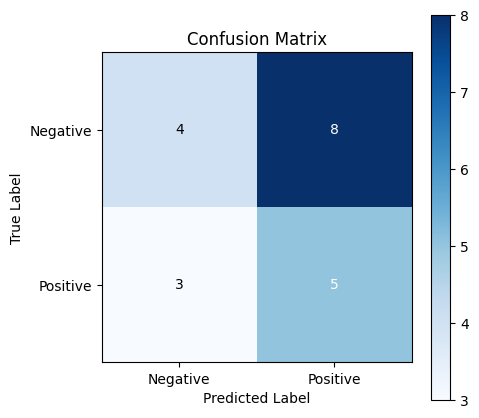

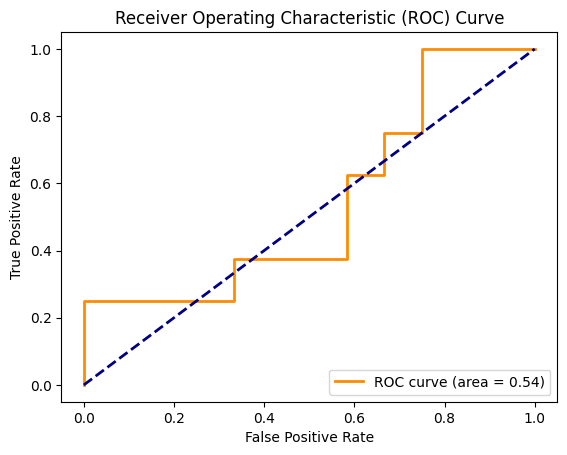

Classification Report:
               precision    recall  f1-score   support

         0.0       0.57      0.33      0.42        12
         1.0       0.38      0.62      0.48         8

    accuracy                           0.45        20
   macro avg       0.48      0.48      0.45        20
weighted avg       0.50      0.45      0.44        20



In [13]:
# Model Evaluation
model.eval()  # Set model to evaluation mode

with torch.no_grad():
    train_preds = model(X_train)
    test_preds = model(X_test)

    # Apply threshold of 0.5
    train_preds_class = (train_preds >= 0.5).float()
    test_preds_class = (test_preds >= 0.5).float()

    # Calculate accuracy
    train_accuracy = (train_preds_class == y_train).sum().item() / y_train.size(0)
    test_accuracy = (test_preds_class == y_test).sum().item() / y_test.size(0)

    # Print accuracies
    print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
    print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')

    # Confusion Matrix
    cm = confusion_matrix(y_test.numpy(), test_preds_class.numpy())
    plt.figure(figsize=(5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xticks(np.arange(2), ['Negative', 'Positive'])
    plt.yticks(np.arange(2), ['Negative', 'Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Annotate cells
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.numpy(), test_preds.numpy())
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Classification Report
    report = classification_report(y_test.numpy(), test_preds_class.numpy())
    print("Classification Report:\n", report)

### Step 6: Model Saving and Loading  

#### Task 6: Save and load the trained model.  

This task demonstrates the techniques to persist a trained model using `torch.save` and reload it using `torch.load`. Evaluating the loaded model ensures that it retains its performance, making it practical for deployment in real-world applications.  

1. Saving the Model:
- Save the model's learned weights and biases using torch.save().( e.g. , torch.save(model.state_dict(), 'our_model_name.pth'))
- Saving only the state dictionary (model parameters) is preferred because it’s more flexible and efficient than saving the entire model object.

2. Loading the Model:
- Create a new model instance (e.g., `model = LogisticRegressionModel()`) and load the saved parameters. ( e.g. , `model.load_state_dict(torch.load('our_model_name.pth'))`)`.

3. Evaluating the Loaded Model:
   - After loading, set the model to evaluation mode by calling `model.eval()
   - After loading the model, evaluate it again on the test dataset to make sure it performs similarly to when it was first trained..Now evaluate it on the test data.
   - Use `torch.no_grad()` to ensure that no gradients are computed.

#### Task 6:  

We write code to save the trained model and reload it. We Ensure the loaded model performs consistently by evaluating it on the test dataset.  


In [12]:
torch.save(model.state_dict(), 'logistic_regression_model.pth')

# Loading the model
loaded_model = LogisticRegressionModel(input_dim)
loaded_model.load_state_dict(torch.load('logistic_regression_model.pth'))
loaded_model.eval()  # Set the model to evaluation mode

# Evaluating the loaded model
with torch.no_grad():
    loaded_preds = loaded_model(X_test)
    loaded_preds_class = (loaded_preds >= 0.5).float()

    # Calculate accuracy
    loaded_accuracy = (loaded_preds_class == y_test).sum().item() / y_test.size(0)

    # Print loaded model accuracy
    print(f'Loaded Model Testing Accuracy: {loaded_accuracy * 100:.2f}%')

Loaded Model Testing Accuracy: 45.00%


### Step 7: Hyperparameter Tuning  

#### Task 7: Perform hyperparameter tuning to find the best learning rate.  

By testing different learning rates, we will identify the optimal rate that provides the best test accuracy. This fine-tuning is crucial for enhancing model performance . 
1. Define Learning Rates:
   - Choose these learning rates to test ,[0.01, 0.05, 0.1]

2. Reinitialize the Model for Each Learning Rate:
  - For each learning rate, we’ll need to reinitialize the model and optimizer e.g.(`torch.optim.SGD(model.parameters(), lr=lr)`).
   - Each new learning rate requires reinitializing the model since the optimizer and its parameters are linked to the learning rate.

3. Train the Model for Each Learning Rate:
  - Train the model for a fixed number of epochs (e.g., 50 or 100 epochs) for each learning rate, and compute the accuracy on the test set.
  - Track the test accuracy for each learning rate and identify which one yields the best performance.

4. Evaluate and Compare:
  - After training with each learning rate, compare the test accuracy for each configuration.
   - Report the learning rate that gives the highest test accuracy

#### Exercise 7:  

Perform hyperparameter tuning to find the best learning rate. Retrain the model for each learning rate and evaluate its performance to identify the optimal rate.  


In [14]:
# Hyperparameter Tuning
learning_rates = [0.01, 0.05, 0.1]
best_accuracy = 0
best_lr = 0

for lr in learning_rates:
    # Reinitialize the model for each learning rate
    model = LogisticRegressionModel(input_dim)
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=0.01)

    # Train the model
    num_epochs = 100
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

    # Evaluate the model
    model.eval()
    with torch.no_grad():
        test_preds = model(X_test)
        test_preds_class = (test_preds >= 0.5).float()
        test_accuracy = (test_preds_class == y_test).sum().item() / y_test.size(0)

    print(f'Learning Rate: {lr}, Test Accuracy: {test_accuracy * 100:.2f}%')

    # Track the best learning rate
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_lr = lr

# Report the best learning rate
print(f'Best Learning Rate: {best_lr}, with Test Accuracy: {best_accuracy * 100:.2f}%')



Learning Rate: 0.01, Test Accuracy: 30.00%
Learning Rate: 0.05, Test Accuracy: 50.00%
Learning Rate: 0.1, Test Accuracy: 50.00%
Best Learning Rate: 0.05, with Test Accuracy: 50.00%


### Step 8: Feature Importance  

#### Task 8: Evaluate feature importance to understand the impact of each feature on the prediction.  

The code to evaluate feature importance to understand the impact of each feature on the prediction.

 1.Extracting Model Weights:
  - The weights of the logistic regression model represent the importance of each feature in making predictions. These weights are stored in the model's linear layer (`model.linear.weight`).
 - we can extract the weights using `model.linear.weight.data.numpy()` and flatten the resulting tensor to get a 1D array of feature importances.

2.Creating a DataFrame:
 - Create a pandas DataFrame with two columns: one for the feature names and the other for their corresponding importance values (i.e., the learned weights).
 - Ensure the features are aligned with their names in our dataset (e.g., `X_train.columns).

3. Sorting and Plotting Feature Importance:
  - Sort the features based on the absolute value of their importance (weights) to identify the most impactful features.
  - Use a bar plot (via `matplotlib`) to visualize the sorted feature importances, with the feature names on the y-axis and importance values on the x-axis.

4. Interpreting the Results:
  - Larger absolute weights indicate more influential features. Positive weights suggest a positive correlation with the outcome (likely to predict the positive class), while negative weights suggest the opposite.

#### Exercise 8:  

Evaluate feature importance by extracting the weights of the linear layer and creating a DataFrame to display the importance of each feature. Visualize the feature importance using a bar plot.  
